In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

training_data = pd.read_csv("training-part-2.csv")
test_data = pd.read_csv("test-part-2.csv")
training_data

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Class
0,0.00,0.00,1.83,2.59,0.00,0.92,0.00,1.21,0.00,0.15,1.37,2.53,0.00,0.45,0.00,0.00,0.00,frown
1,0.00,0.00,1.83,0.05,0.00,0.00,0.05,0.84,0.00,1.30,2.05,2.07,2.07,0.94,0.00,1.00,0.00,frown
2,0.00,0.22,1.52,1.20,0.57,0.00,0.71,1.28,0.00,0.00,1.66,0.20,0.00,0.19,0.00,0.00,0.00,frown
3,0.00,0.00,1.44,0.00,0.50,1.54,0.95,1.07,0.00,0.00,1.07,1.14,0.64,0.00,0.00,0.00,0.00,frown
4,0.96,0.10,2.46,0.56,0.00,1.07,0.00,0.00,0.00,0.00,0.00,0.00,0.34,0.00,0.31,0.12,0.43,frown
5,0.06,0.00,2.39,0.00,0.00,2.17,0.00,0.00,0.00,0.00,1.85,0.48,0.88,0.16,0.00,0.00,1.28,frown
6,0.34,0.33,0.11,0.50,0.00,0.00,0.00,0.00,0.00,0.09,1.21,0.65,0.60,0.00,0.00,0.00,0.14,frown
7,1.77,2.40,1.87,1.89,0.00,0.00,0.00,0.05,0.00,0.02,0.68,0.00,0.00,0.00,0.00,0.00,0.00,frown
8,0.00,0.00,2.82,0.11,0.00,0.27,0.34,1.29,0.00,0.00,0.16,0.00,0.00,0.00,0.99,0.00,0.00,frown
9,1.50,0.21,4.79,0.03,1.28,2.88,1.68,2.04,0.08,0.00,0.00,0.00,0.00,0.00,2.98,0.85,0.66,frown


In [3]:
X_train = training_data.iloc[:, 0:17].values
y_train = training_data.iloc[:, 17].values

X_test = test_data.iloc[:, 0:17].values
y_test = test_data.iloc[:, 17].values


In [4]:
for i in range(len(y_train)):
    if y_train[i] == "smile":
        y_train[i] = 1
    else:
        y_train[i] = 0
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=object)

In [10]:
def nb_predictions(x, psis, phis, K):
    n, d = x.shape
    x = np.reshape(x, (1, n, d))
    psis = np.reshape(psis, (K, 1, d))
    psis = psis.clip(1e-12, 1-1e-12)
    #compute probabilities
    logpy = np.log(np.tile(phis.reshape((K, 1)), (1,n)).reshape([K, n, 1]))
    logpxy = x * np.log(psis) + (1-x) * np.log(1-psis)
    logpyx = (logpxy + logpy).sum(axis=2)

    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n])



In [14]:
d = X_train.shape[1]
n = X_train.shape[0]
K = 2

psis = np.zeros([K,d])
phis = np.zeros([K])

for k in range(K):
    X_k = X_train[y_train == k]
    psis[k] = np.mean(X_k, axis = 0) 
    phis[k] = X_k.shape[0]/float(n)

idx,pyx = nb_predictions(X_train, psis, phis, K)
idx_test,pyx_test = nb_predictions(X_test, psis, phis, K)
#print(idx)
print(idx_test)
print(y_test)


[0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1]
['frown' 'frown' 'frown' 'frown' 'frown' 'frown' 'frown' 'frown' 'smile'
 'smile' 'smile' 'smile' 'smile' 'smile' 'smile' 'smile']


In [15]:
15/16 * 100

93.75

In [1]:
from math import sqrt

#Encoding
#cleanup_nums = {"Class":{"frown": 0, "smile": 1}}
#training_data = training_data.replace(cleanup_nums)

#Separate by Class
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

separated = separate_by_class(training_data.values)

#Calculate the mean
def mean(numbers):
	return sum(numbers)/float(len(numbers))

# Calculate the stdev
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries

summary = summarize_dataset(training_data.values)

def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries

summary = summarize_by_class(training_data.values)
for label in summary:
	print(label)
	for row in summary[label]:
		print(row)

NameError: name 'training_data' is not defined

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

training_data = pd.read_csv("training-part-2.csv")
test_data = pd.read_csv("test-part-2.csv")

def nb_predictions(X, y, K):
    n, d = X.shape
    psis = np.zeros([K,d])
    phis = np.zeros([K])
    
    for i in range(len(y)):
        if y[i] == "smile":
            y[i] = 1
        else:
            y[i] = 0
        
    for k in range(K):
        X_k = X[y == k]
        psis[k] = np.mean(X_k, axis = 0) 
        phis[k] = X_k.shape[0]/float(n)
    
    X = np.reshape(X, (1, n, d))
    psis = np.reshape(psis, (K, 1, d))
    psis = psis.clip(1e-12, 1-1e-12)
    logpy = np.log(np.tile(phis.reshape((K, 1)), (1,n)).reshape([K, n, 1]))
    logpxy = X * np.log(psis) + (1-X) * np.log(1-psis)
    logpyx = (logpxy + logpy).sum(axis=2)

    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n])

X_train = training_data.iloc[:, 0:17].values
y_train = training_data.iloc[:, 17].values

X_test = test_data.iloc[:, 0:17].values
y_test = test_data.iloc[:, 17].values
        
K = len(np.unique(y_train))

idx_train,pyx_train = nb_predictions(X_train, y_train, K)
idx_test,pyx_test = nb_predictions(X_test, y_test, K)

print(idx_test)




In [ ]:
def calculate_probability(x, mean, stdev):
	exponent = np.exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * np.pi) * stdev)) * exponent

def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, count = class_summaries[i]
			probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
	return probabilities

summaries = summarize_by_class(training_data.values)
probabilities = calculate_class_probabilities(summaries, training_data.values[0])
print(probabilities)

{0.0: 1.6053275696392414e-07, 1.0: 0.0}


In [64]:
from random import seed
from random import randrange

# Predict the class for a given row
def predict(summaries, row):
	probabilities = calculate_class_probabilities(summaries, row)
	best_label, best_prob = None, -1
	for class_value, probability in probabilities.items():
		if best_label is None or probability > best_prob:
			best_prob = probability
			best_label = class_value
	return best_label

# Naive Bayes Algorithm
def naive_bayes(train, test):
	summarize = summarize_by_class(train)
	predictions = list()
	for row in test:
		output = predict(summarize, row)
		predictions.append(output)
	return(predictions)

scores = evaluate_algorithm(training_data.values, naive_bayes, 5)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

model = summarize_by_class(training_data.values)
label = predict(model, row)
print('Data=%s, Predicted: %s' % (row, label))


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [7]:
from gda import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)
test_data["Result"] = model.predict(X_test).tolist()
test_data

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Class,Result
0,0.34,0.44,1.13,0.18,1.87,3.55,4.08,1.35,0.00,0.54,0.80,1.89,0.00,0.96,0.74,1.71,0.57,frown,frown
1,0.74,0.00,1.34,0.00,1.10,2.80,2.64,1.35,0.00,0.20,0.80,0.00,0.57,0.34,0.75,0.27,0.00,frown,frown
2,0.75,0.07,2.87,0.02,0.86,1.34,0.96,1.68,0.19,1.14,1.23,1.22,0.00,0.00,0.84,0.00,0.00,frown,frown
3,0.15,0.24,2.79,0.21,0.79,3.00,0.36,1.58,0.00,0.78,1.14,1.36,0.46,0.17,0.45,0.99,1.67,frown,0
4,1.05,0.31,3.95,1.49,2.27,3.09,2.30,3.43,0.88,1.27,0.00,0.00,1.68,0.00,3.03,1.04,0.00,frown,0
5,1.48,0.83,2.30,0.73,0.61,2.97,0.76,0.57,0.00,0.00,0.17,0.66,1.39,0.00,0.00,0.00,0.00,frown,frown
6,0.00,0.00,2.26,0.53,0.00,0.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,frown,frown
7,0.07,0.00,1.87,0.02,0.38,2.52,0.00,0.00,0.54,0.46,0.00,0.00,0.46,0.04,0.53,0.38,0.00,frown,0
8,0.00,0.00,0.00,0.00,1.55,2.61,0.00,0.08,2.25,1.00,0.00,0.00,1.24,0.01,1.20,1.02,0.00,smile,smile
9,0.72,0.00,0.60,0.43,2.63,1.22,0.01,2.26,3.06,1.89,0.00,0.00,0.00,0.00,2.96,0.00,0.00,smile,smile


In [8]:
from gda import GaussianDiscriminantAnalysis

gda = GaussianDiscriminantAnalysis()
gda.fit(X_train, y_train)
predicted_data = test_data.copy()
predicted_data["Result"] = gda.predict(X_test).tolist()
predicted_data

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Class,Result
0,0.34,0.44,1.13,0.18,1.87,3.55,4.08,1.35,0.00,0.54,0.80,1.89,0.00,0.96,0.74,1.71,0.57,frown,frown
1,0.74,0.00,1.34,0.00,1.10,2.80,2.64,1.35,0.00,0.20,0.80,0.00,0.57,0.34,0.75,0.27,0.00,frown,frown
2,0.75,0.07,2.87,0.02,0.86,1.34,0.96,1.68,0.19,1.14,1.23,1.22,0.00,0.00,0.84,0.00,0.00,frown,frown
3,0.15,0.24,2.79,0.21,0.79,3.00,0.36,1.58,0.00,0.78,1.14,1.36,0.46,0.17,0.45,0.99,1.67,frown,frown
4,1.05,0.31,3.95,1.49,2.27,3.09,2.30,3.43,0.88,1.27,0.00,0.00,1.68,0.00,3.03,1.04,0.00,frown,frown
5,1.48,0.83,2.30,0.73,0.61,2.97,0.76,0.57,0.00,0.00,0.17,0.66,1.39,0.00,0.00,0.00,0.00,frown,frown
6,0.00,0.00,2.26,0.53,0.00,0.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,frown,frown
7,0.07,0.00,1.87,0.02,0.38,2.52,0.00,0.00,0.54,0.46,0.00,0.00,0.46,0.04,0.53,0.38,0.00,frown,smile
8,0.00,0.00,0.00,0.00,1.55,2.61,0.00,0.08,2.25,1.00,0.00,0.00,1.24,0.01,1.20,1.02,0.00,smile,smile
9,0.72,0.00,0.60,0.43,2.63,1.22,0.01,2.26,3.06,1.89,0.00,0.00,0.00,0.00,2.96,0.00,0.00,smile,smile


<AxesSubplot:xlabel='Result', ylabel='Count'>

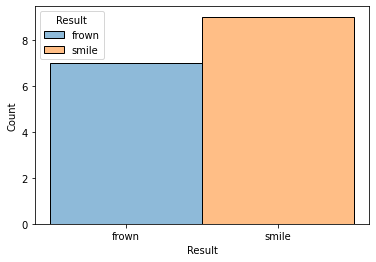

In [21]:
seaborn.histplot(data=predicted_data, x="Result", hue="Result")

In [10]:
from gda import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
predicted_data = test_data.copy()
predicted_data["Result"] = gnb.predict(X_test).tolist()
predicted_data

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Class,Result
0,0.34,0.44,1.13,0.18,1.87,3.55,4.08,1.35,0.00,0.54,0.80,1.89,0.00,0.96,0.74,1.71,0.57,frown,frown
1,0.74,0.00,1.34,0.00,1.10,2.80,2.64,1.35,0.00,0.20,0.80,0.00,0.57,0.34,0.75,0.27,0.00,frown,frown
2,0.75,0.07,2.87,0.02,0.86,1.34,0.96,1.68,0.19,1.14,1.23,1.22,0.00,0.00,0.84,0.00,0.00,frown,frown
3,0.15,0.24,2.79,0.21,0.79,3.00,0.36,1.58,0.00,0.78,1.14,1.36,0.46,0.17,0.45,0.99,1.67,frown,frown
4,1.05,0.31,3.95,1.49,2.27,3.09,2.30,3.43,0.88,1.27,0.00,0.00,1.68,0.00,3.03,1.04,0.00,frown,smile
5,1.48,0.83,2.30,0.73,0.61,2.97,0.76,0.57,0.00,0.00,0.17,0.66,1.39,0.00,0.00,0.00,0.00,frown,frown
6,0.00,0.00,2.26,0.53,0.00,0.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,frown,frown
7,0.07,0.00,1.87,0.02,0.38,2.52,0.00,0.00,0.54,0.46,0.00,0.00,0.46,0.04,0.53,0.38,0.00,frown,frown
8,0.00,0.00,0.00,0.00,1.55,2.61,0.00,0.08,2.25,1.00,0.00,0.00,1.24,0.01,1.20,1.02,0.00,smile,smile
9,0.72,0.00,0.60,0.43,2.63,1.22,0.01,2.26,3.06,1.89,0.00,0.00,0.00,0.00,2.96,0.00,0.00,smile,smile


<AxesSubplot:xlabel='Result', ylabel='Count'>

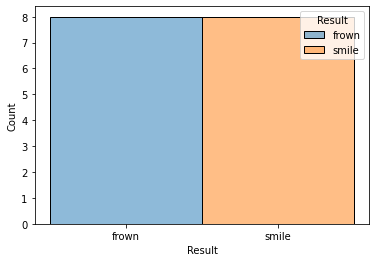

In [11]:
seaborn.histplot(data=predicted_data, x="Result", hue="Result")